In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
import pandas as pd
import requests

In [2]:
df = pd.read_csv('/Users/riyamhatre/Desktop/scraped_data.csv').drop(columns = {'Unnamed: 0'})

In [3]:
df.isnull().sum() / len(df)

show_id                0.000000
type                   0.000000
title                  0.000000
imdb_ratings           0.128310
director               0.298784
cast                   0.093420
country                0.093533
date_added             0.001136
release_year           0.000000
rating                 0.000000
duration               0.000000
listed_in              0.000000
description            0.000000
genre                  0.003523
languages              0.002500
imdb_votes             0.014547
box_office_earnings    0.971588
language               0.019775
box_office             0.664735
awards                 0.450278
dtype: float64

In [4]:
df = df.drop(columns = {'box_office_earnings','languages'})

In [5]:
df['imdb_votes'] = df['imdb_votes'].str.replace(',', '')

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
imdb_ratings    1129
director        2629
cast             822
country          823
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
genre             31
imdb_votes       128
language         174
box_office      5849
awards          3962
dtype: int64

In [7]:
df['duration'] = df['duration'].str.split(' ').apply(lambda x: int(x[0]))

df = df[df['title'].str.contains('Afterparty') == False]
drop_index= df[(df['imdb_votes'] =='v') & (df['genre'] =='M') & (df['imdb_ratings'].isna() == True)].index
df = df.drop(drop_index)
df = df.drop(df[df['imdb_votes'].isna()].index)

In [8]:
df.shape

(7759, 18)

In [9]:
df['awards'] = df['awards'].replace(np.nan, '')

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
imdb_ratings      91
director        2259
cast             704
country          518
date_added         9
release_year       0
rating             0
duration           0
listed_in          0
description        0
genre             16
imdb_votes         0
language         157
box_office      4810
awards             0
dtype: int64

In [11]:
df.loc[(df['genre'] == 'M') | (df['genre'].isna()), 'genre'] = df.loc[(df['genre'] == 'M') | (df['genre'].isna()), 'listed_in']

In [12]:
df = df[df['title'].str.contains('Afterparty') == False]
drop_index= df[df['imdb_ratings'].isna() == True].index
df = df.drop(drop_index)
df = df.drop(df[df['imdb_votes'].isna()].index)

In [13]:
df['awards'] = df['awards'].replace(np.nan, '')

In [14]:
df['binary_awards'] = df['awards'].apply(lambda x: 1 if x!='' else 0)

In [15]:
# from pathlib import Path
# filepath = Path('/Users/riyamhatre/Desktop/cleaned_imdb.csv')
# filepath.parent.mkdir(parents=True, exist_ok = True)
# df.to_csv(filepath)

In [15]:
df = pd.read_csv('/Users/riyamhatre/Desktop/cleaned_imdb.csv').drop(columns = {'Unnamed: 0'})

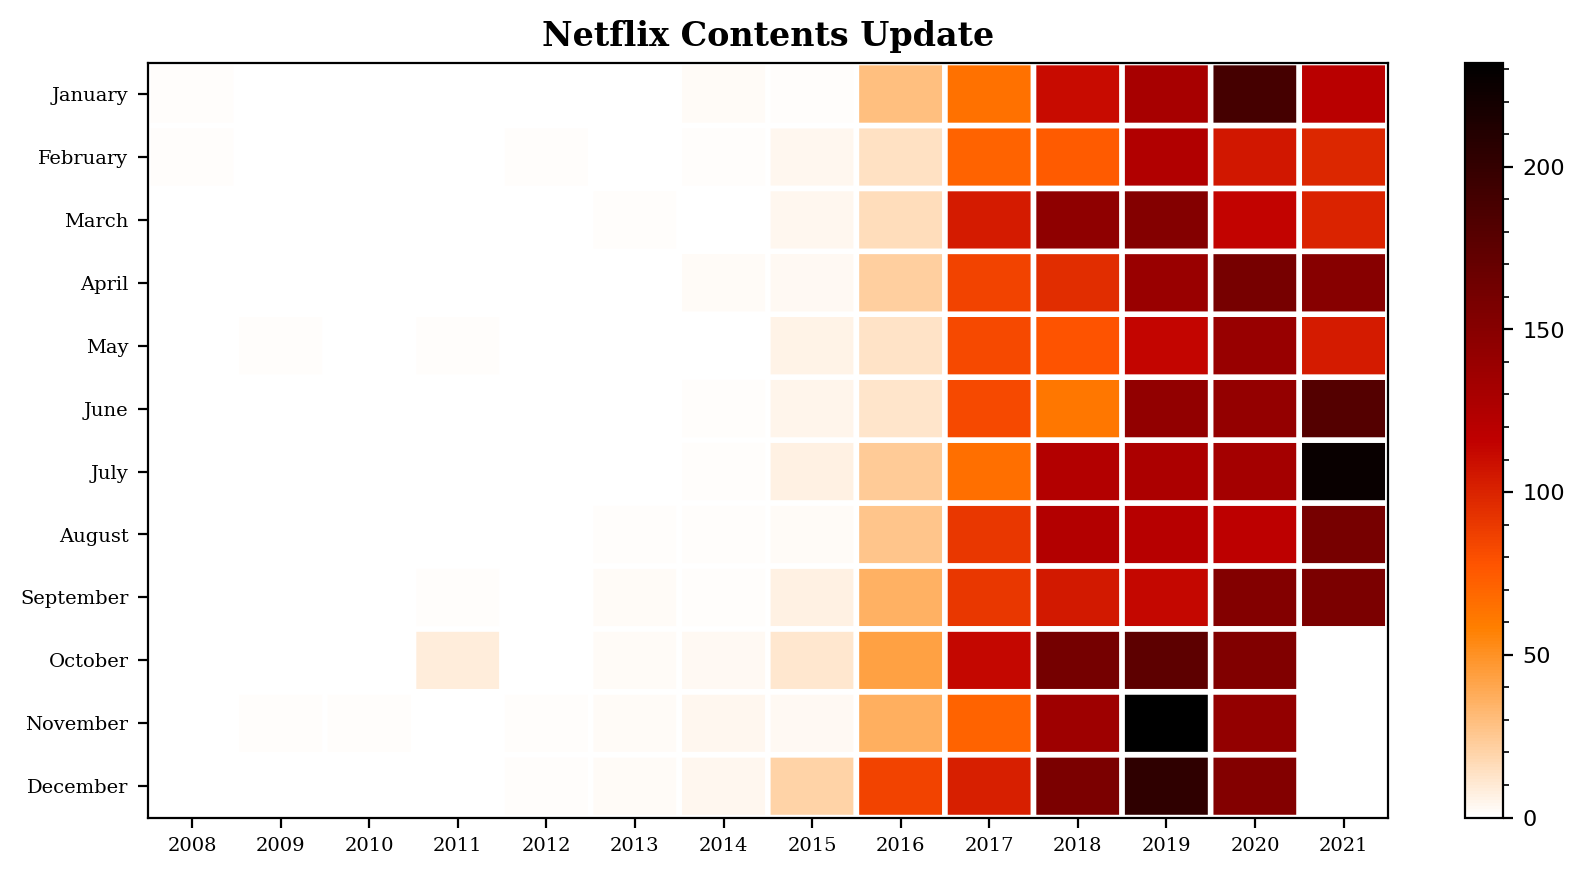

In [16]:
netflix_date = df[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
new_df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10, 5), dpi=200)
plt.pcolor(new_df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(new_df.columns), 1), new_df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(new_df.index), 1), new_df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

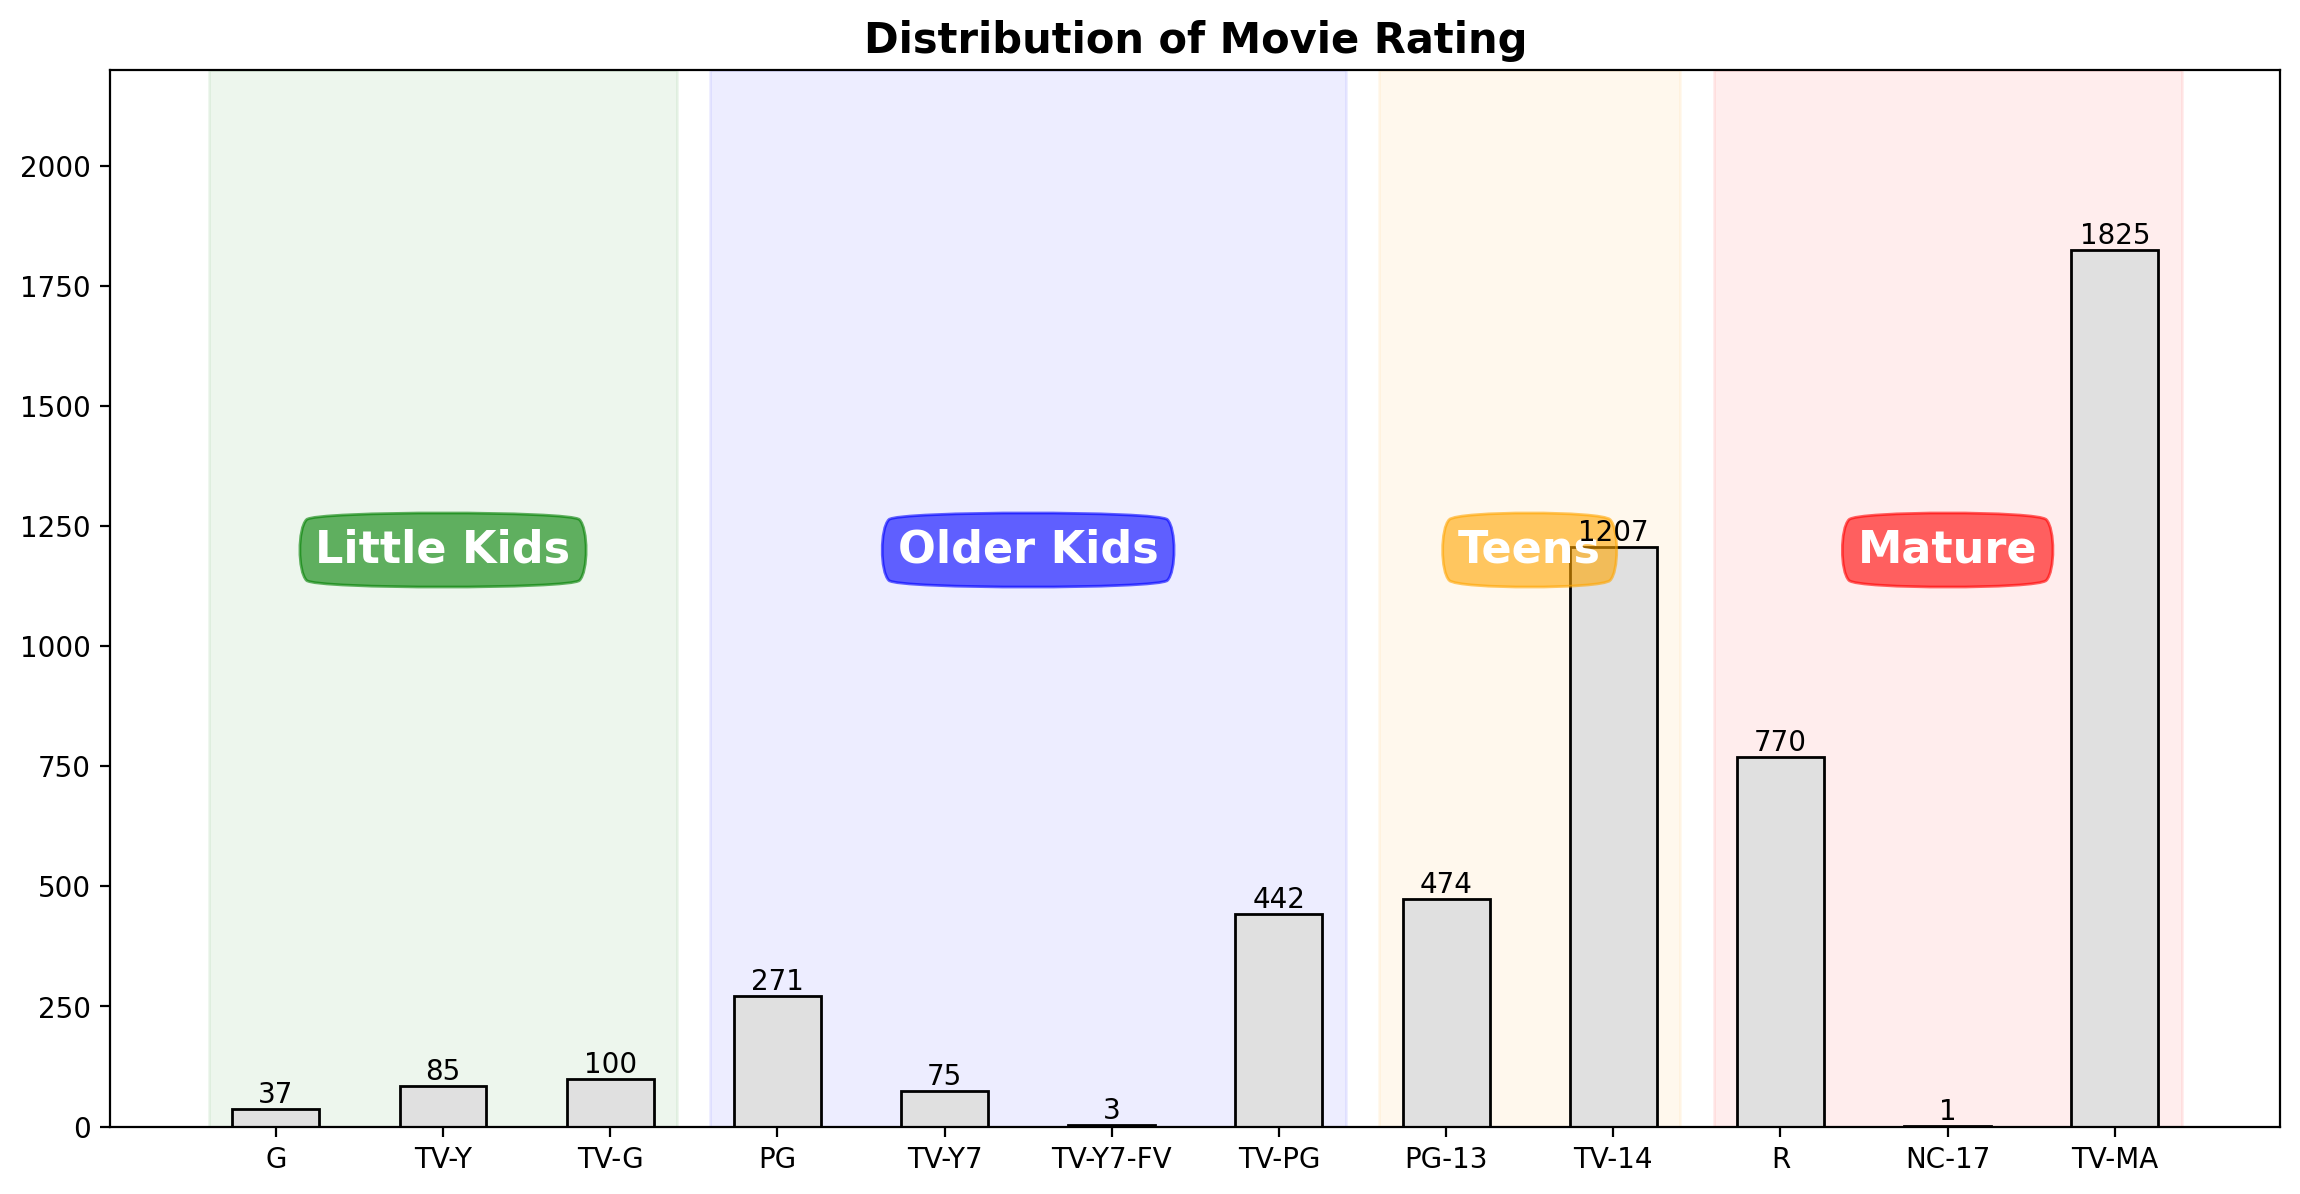

In [17]:
movie = df[df['type'] == 'Movie']    
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]   

def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating', fontsize=15, fontweight='bold')
    ax.bar_label(ax.bar(movie_rating.to_frame().reset_index()['rating'], movie_rating.to_frame().reset_index()['count'],color="#e0e0e0", width=0.52, edgecolor='black'))
    plt.show()
    


rating_barplot(movie_rating,'Movie', 1200, 2200)

In [20]:
movies_only = list(df[df['type'] == "Movie"]['duration'])

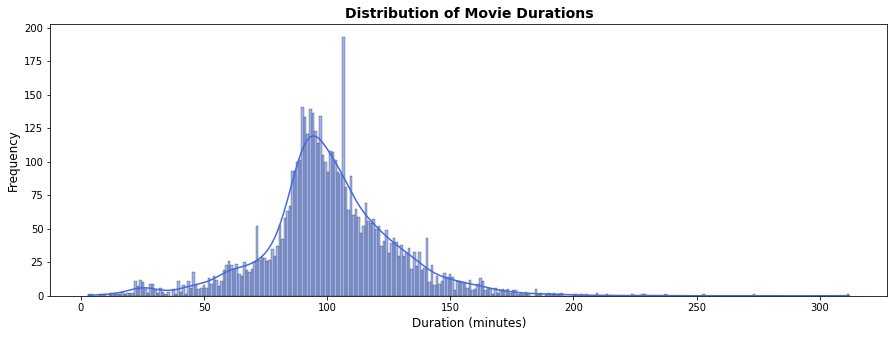

In [21]:
# Create figure
plt.figure(figsize=(15, 5))

# Plot histogram
sns.histplot(movies_only, bins=300, kde=True, color="royalblue")

# Add labels and title
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Movie Durations", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

In [22]:
tv_only  =list(df[df['type'] == "TV Show"]['duration'])

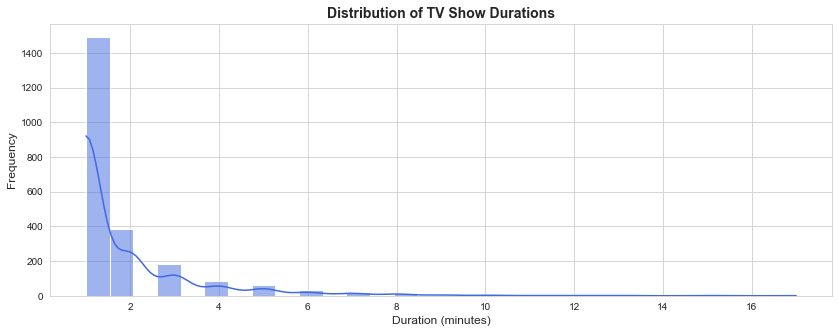

In [24]:
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(14, 5))

# Plot histogram
sns.histplot(tv_only, bins=30, color="royalblue", kde = True)


# Add labels and title
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of TV Show Durations", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

In [25]:
import itertools

flattened_list = list(itertools.chain(*df['listed_in'].str.split(', ')))

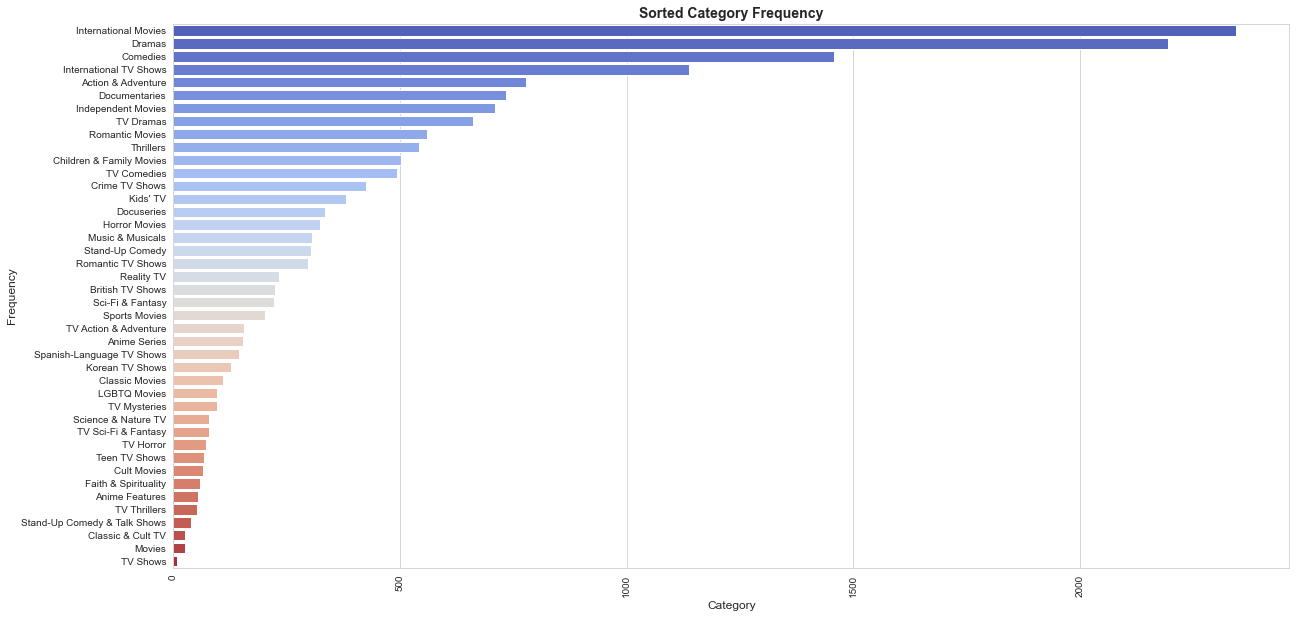

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count occurrences of each category
category_counts = Counter(flattened_list)

sorted_labels, sorted_counts = zip(*sorted(category_counts.items(), key=lambda x: x[1], reverse=True))

# Set theme for aesthetics
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(20, 10))

# Bar plot
ax = sns.barplot(x=list(sorted_counts), y=list(sorted_labels), palette="coolwarm")


# # Add labels on bars
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', 
#                 (p.get_x() + p.get_width() / 2, p.get_height()), 
#                 ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Sorted Category Frequency", fontsize=14, fontweight='bold')

# Rotate x-labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()

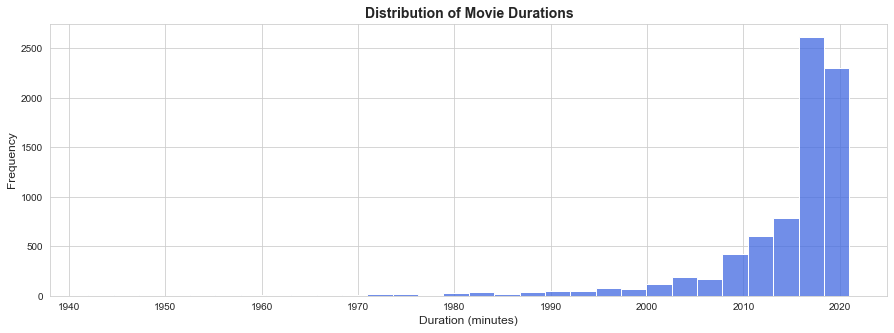

In [27]:
# Create figure
plt.figure(figsize=(15, 5))

# Plot histogram
sns.histplot(df['release_year'], bins=30, color="royalblue")

# Add labels and title
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Movie Durations", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

In [28]:
flattened_langs = list(itertools.chain(*df['language'].fillna("n/a").str.split(', ')))

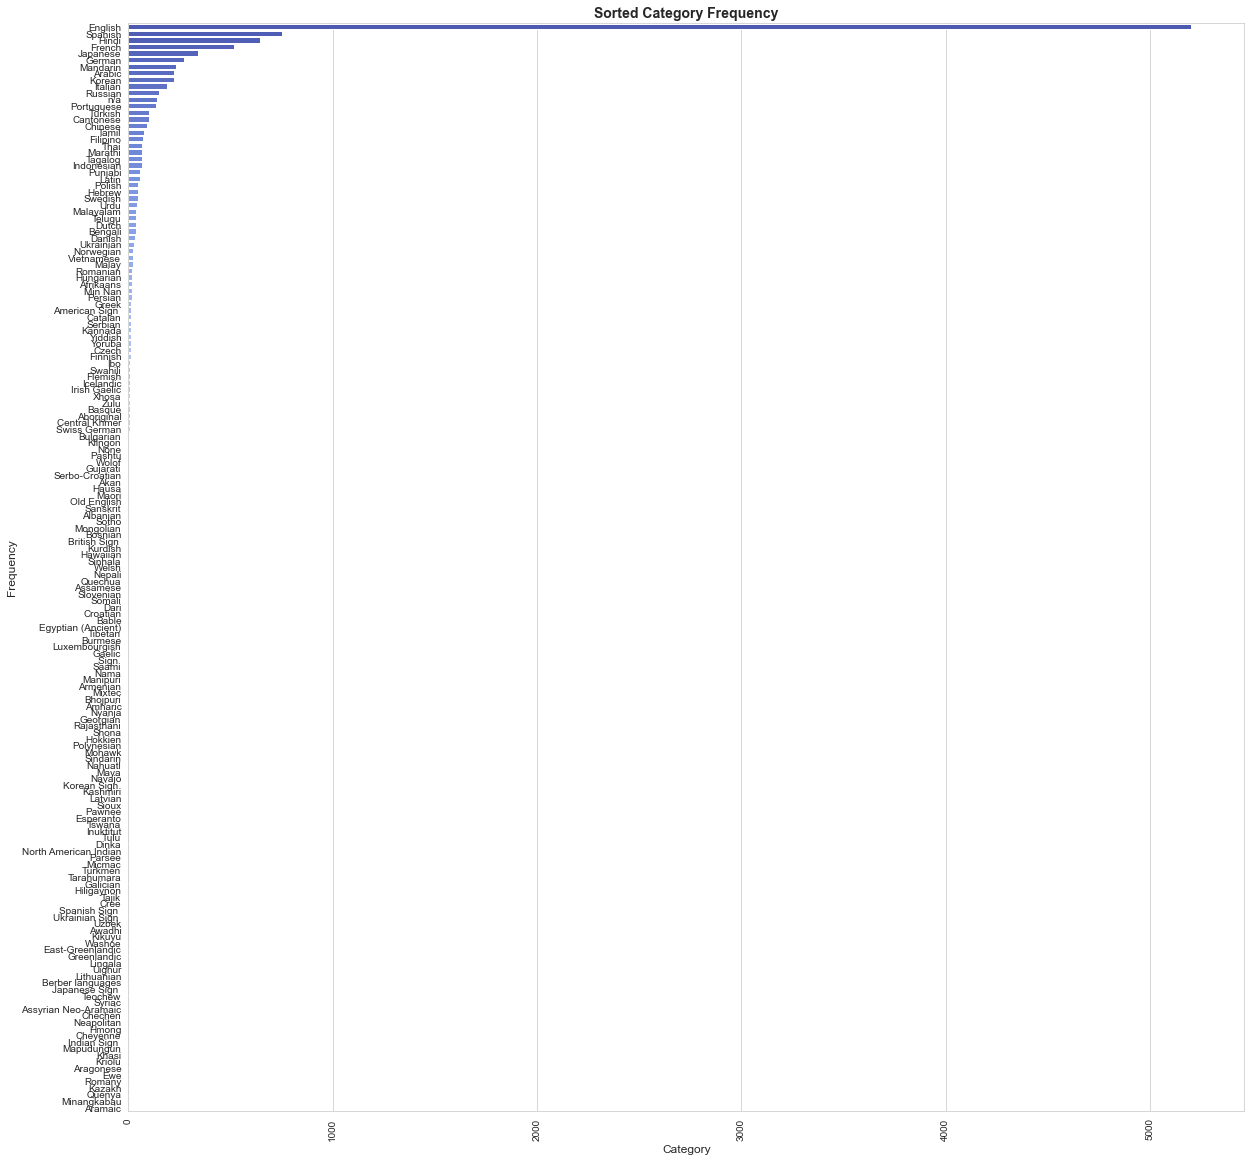

In [29]:
category_counts = Counter(flattened_langs)

sorted_labels, sorted_counts = zip(*sorted(category_counts.items(), key=lambda x: x[1], reverse=True))

# Set theme for aesthetics
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(20, 20))

# Bar plot
ax = sns.barplot(x=list(sorted_counts), y=list(sorted_labels), palette="coolwarm")


# # Add labels on bars
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', 
#                 (p.get_x() + p.get_width() / 2, p.get_height()), 
#                 ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Sorted Category Frequency", fontsize=14, fontweight='bold')

# Rotate x-labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [30]:
flattened_country = list(itertools.chain(*df['country'].fillna("n/a").str.split(', ')))

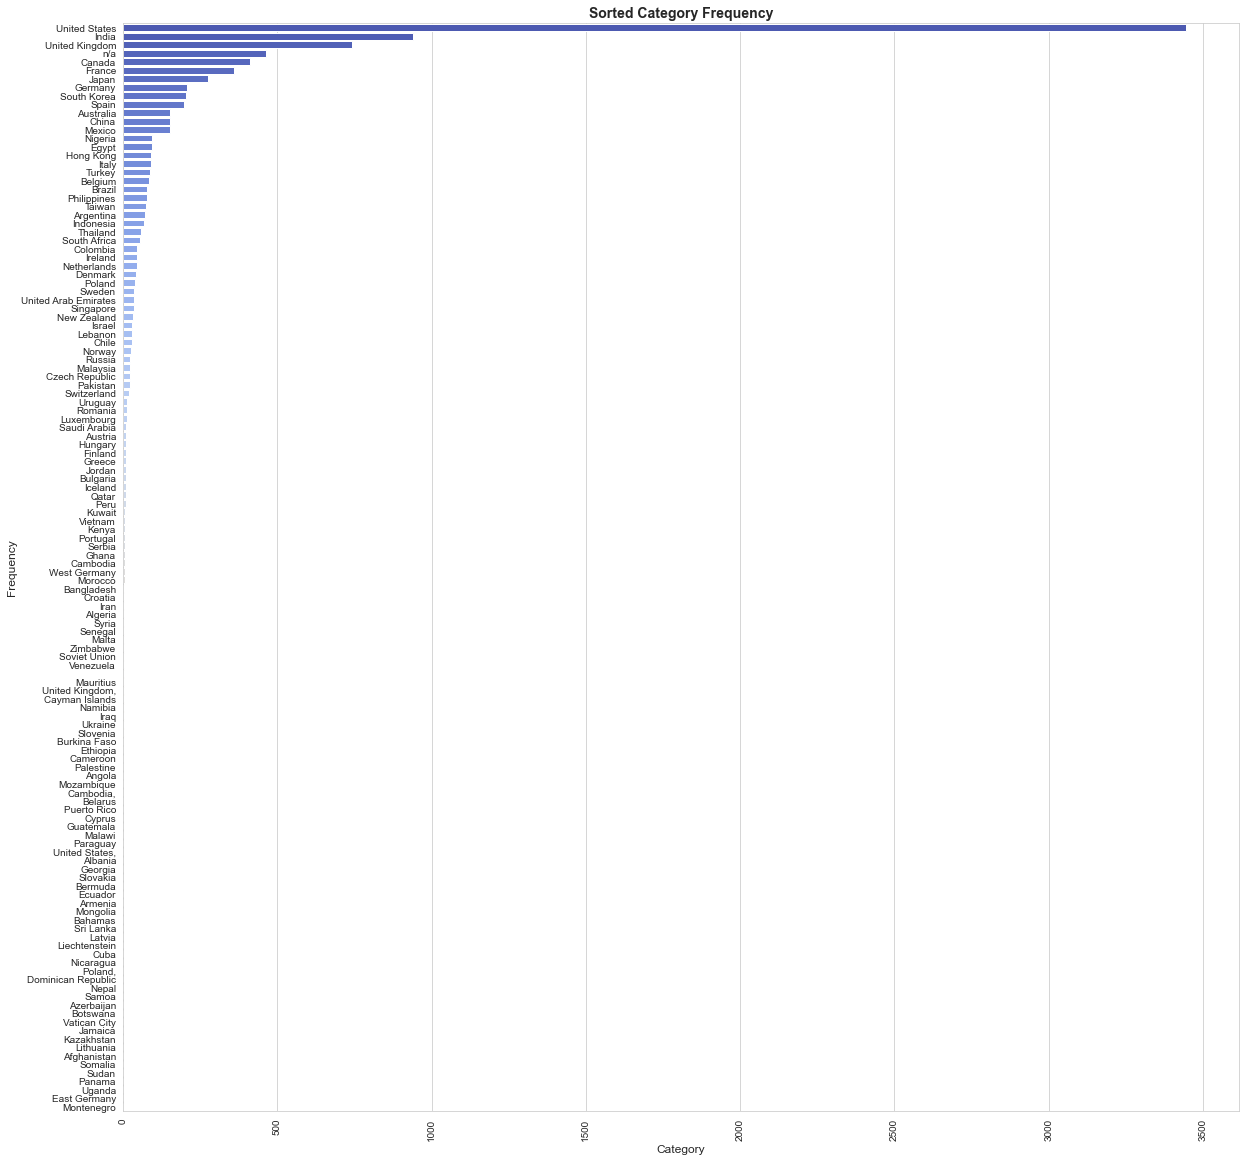

In [32]:
category_counts = Counter(flattened_country)

sorted_labels, sorted_counts = zip(*sorted(category_counts.items(), key=lambda x: x[1], reverse=True))

# Set theme for aesthetics
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(20, 20))

# Bar plot
ax = sns.barplot(x=list(sorted_counts), y=list(sorted_labels), palette="coolwarm")

# Add labels and title
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Sorted Category Frequency", fontsize=14, fontweight='bold')

# Rotate x-labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [40]:
flattened_genre = list(itertools.chain(*df['genre'].str.split(', ')))

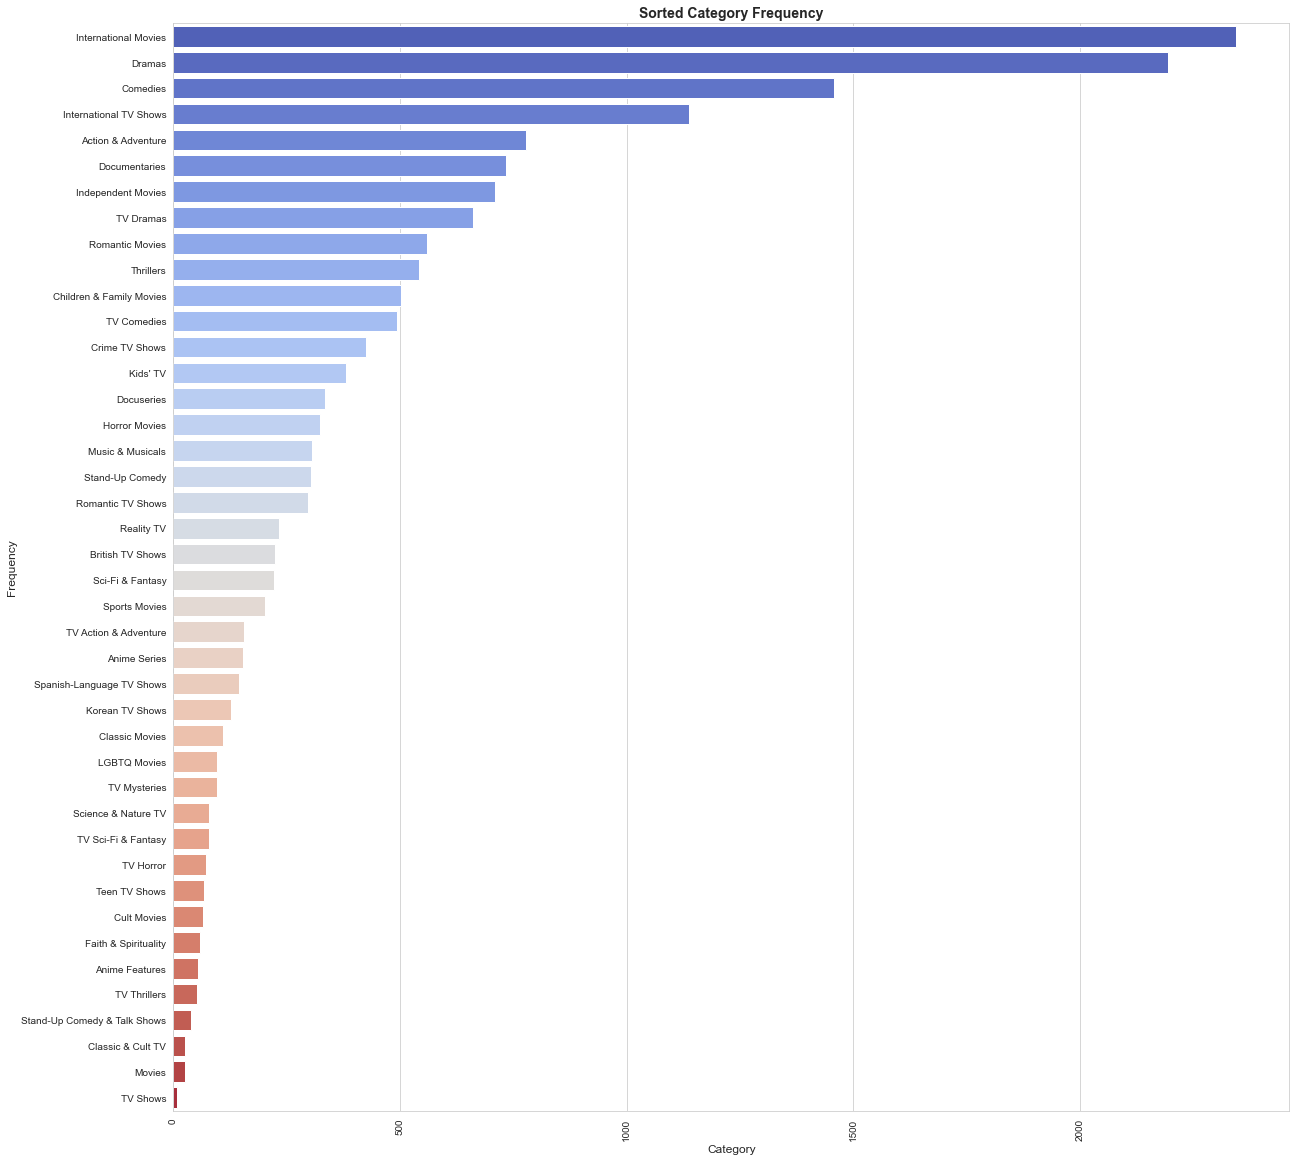

In [33]:
category_counts = Counter(flattened_list)

sorted_labels, sorted_counts = zip(*sorted(category_counts.items(), key=lambda x: x[1], reverse=True))

# Set theme for aesthetics
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(20, 20))

# Bar plot
ax = sns.barplot(x=list(sorted_counts), y=list(sorted_labels), palette="coolwarm")


# # Add labels on bars
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', 
#                 (p.get_x() + p.get_width() / 2, p.get_height()), 
#                 ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Sorted Category Frequency", fontsize=14, fontweight='bold')

# Rotate x-labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()